In [13]:
# check news data 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters  # reuter news data from keras dataset- tokenization, encoding completed): news = 11,258  category = 46


In [2]:
# data split(8:2) 

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

print('news as training data : {}'.format(len(X_train)))
print('news as test data : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('news_classes : {}'.format(num_classes))

2121728/2110848 [==============================] - 0s 0us/step
news as training data : 8982
news as test data : 2246
news_classes : 46


In [3]:
print('first news in traing data :',X_train[0])
print('news label of the first news :',y_train[0])

first news in traing data : [1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
news label of the first news : 3


the longest length of the news samples :2376
the average length of the news samples :145.5398574927633


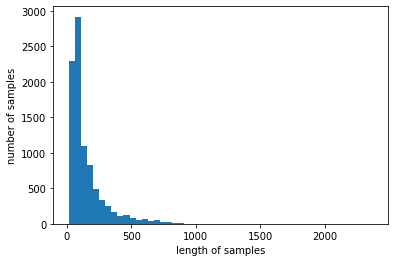

In [4]:
print('the longest length of the news samples :{}'.format(max(len(sample) for sample in X_train)))
print('the average length of the news samples :{}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(sample) for sample in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


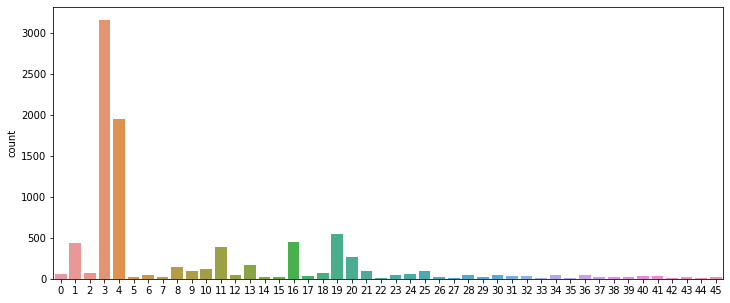

In [5]:
# distribution of news labels
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [6]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("frequency of each label:")
print(np.asarray((unique_elements, counts_elements)))

frequency of each label:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [8]:
# word index
word_to_index = reuters.get_word_index()
#print(word_to_index)

565248/550378 [==============================] - 0s 0us/step


In [10]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key  # index to word +3 (0: padding, 1: sos, 2: OOV)

print('first word in the freq list  : {}'.format(index_to_word[4]))
print('128th word in the freq list  : {}'.format(index_to_word[131]))

first word in the freq list  : the
128th word in the freq list  : tax


In [11]:
# include 3 tokens (pad, sos, unk) into index_to_word (following Keras rules for reuter news dataset)
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

print(' '.join([index_to_word[index] for index in X_train[0]]))  

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [14]:
# news classification using LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 1000
max_len = 100

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
embedding_dim = 128
hidden_units = 128
num_classes = 46

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))   # multi-class classification 

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)  # val_loss increases 4 times continuously, stop training to avoid overfitting
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) # store the model only val_acc is better than before

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(X_test, y_test))

Epoch 1/30
71/71 [==============================] - ETA: 0s - loss: 2.6050 - acc: 0.3477
Epoch 1: val_acc improved from -inf to 0.36198, saving model to best_model.h5
71/71 [==============================] - 32s 416ms/step - loss: 2.6050 - acc: 0.3477 - val_loss: 2.4100 - val_acc: 0.3620
Epoch 2/30
71/71 [==============================] - ETA: 0s - loss: 2.2738 - acc: 0.4104
Epoch 2: val_acc improved from 0.36198 to 0.49777, saving model to best_model.h5
71/71 [==============================] - 29s 402ms/step - loss: 2.2738 - acc: 0.4104 - val_loss: 2.0577 - val_acc: 0.4978
Epoch 3/30
71/71 [==============================] - ETA: 0s - loss: 2.0318 - acc: 0.4982
Epoch 3: val_acc improved from 0.49777 to 0.50178, saving model to best_model.h5
71/71 [==============================] - 28s 400ms/step - loss: 2.0318 - acc: 0.4982 - val_loss: 1.9866 - val_acc: 0.5018
Epoch 4/30
71/71 [==============================] - ETA: 0s - loss: 1.8800 - acc: 0.5396
Epoch 4: val_acc improved from 0.50178

In [16]:
loaded_model = load_model('best_model.h5')
print("\n test accuracy: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 3s 35ms/step - loss: 1.1730 - acc: 0.7182

 test accuracy: 0.7182


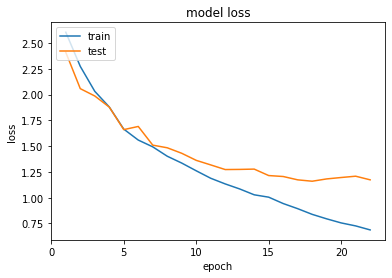

In [17]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()